In [ ]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [ ]:
df = pd.read_csv("student-mat.csv")

In [ ]:
#Dropping columns/feature that are not relevant to the project

dropped_columns = df.drop(['school','sex','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','famsup','schoolsup','nursery','romantic'], axis = 1)
dropped_columns

,age,address,studytime,failures,paid,activities,higher,internet,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,U,2,0,no,no,yes,no,4,3,4,1,1,3,6,5,6,6
1,17,U,2,0,no,no,yes,yes,5,3,3,1,1,3,4,5,5,6
2,15,U,2,3,yes,no,yes,yes,4,3,2,2,3,3,10,7,8,10
3,15,U,3,0,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,16,U,2,0,yes,no,yes,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,U,2,2,yes,no,yes,no,5,5,4,4,5,4,11,9,9,9
391,17,U,1,0,no,no,yes,yes,2,4,5,3,4,2,3,14,16,16
392,21,R,1,3,no,no,yes,no,5,5,3,3,3,3,3,10,8,7
393,18,R,1,0,no,no,yes,yes,4,4,1,3,4,5,0,11,12,10


In [ ]:
#One hot encode the new dataframe created
cols = ['paid','activities','higher','internet','address']

ohe_dataset = pd.get_dummies(dropped_columns, columns=cols, drop_first=True)
ohe_dataset

,age,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,paid_yes,activities_yes,higher_yes,internet_yes,address_U
0,18,2,0,4,3,4,1,1,3,6,5,6,6,0,0,1,0,1
1,17,2,0,5,3,3,1,1,3,4,5,5,6,0,0,1,1,1
2,15,2,3,4,3,2,2,3,3,10,7,8,10,1,0,1,1,1
3,15,3,0,3,2,2,1,1,5,2,15,14,15,1,1,1,1,1
4,16,2,0,4,3,2,1,2,5,4,6,10,10,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,5,5,4,4,5,4,11,9,9,9,1,0,1,0,1
391,17,1,0,2,4,5,3,4,2,3,14,16,16,0,0,1,1,1
392,21,1,3,5,5,3,3,3,3,3,10,8,7,0,0,1,0,0
393,18,1,0,4,4,1,3,4,5,0,11,12,10,0,0,1,1,0


# Analyzing Data


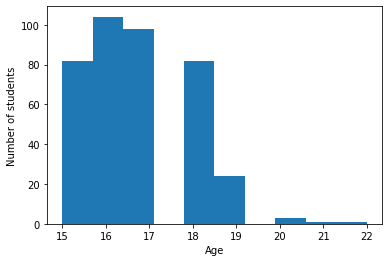

In [ ]:
#Analyzing the number of students according to age
plt.hist(ohe_dataset['age'])
plt.xlabel("Age")
plt.ylabel("Number of students")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


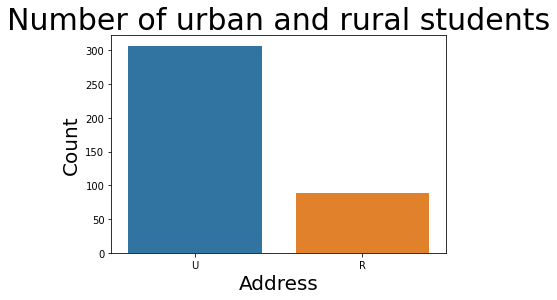

In [ ]:
#Finding out the number of urban and rural students
b = sns.countplot(df['address'])
b.axes.set_title('Number of urban and rural students', fontsize = 30)
b.set_xlabel('Address', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

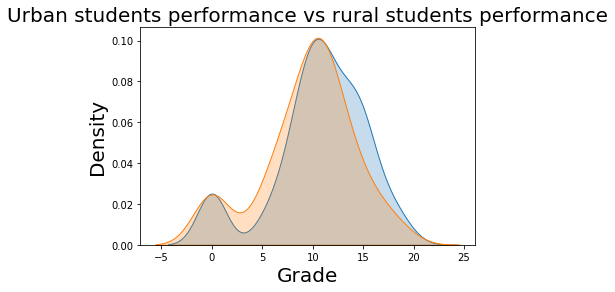

In [ ]:
# Grade distribution by address
sns.kdeplot(df.loc[df['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(df.loc[df['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Urban students performance vs rural students performance', fontsize = 20)
plt.xlabel('Grade', fontsize = 20);
plt.ylabel('Density', fontsize = 20)
plt.show()

Not much of a difference between urban and rural students in this particular area

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


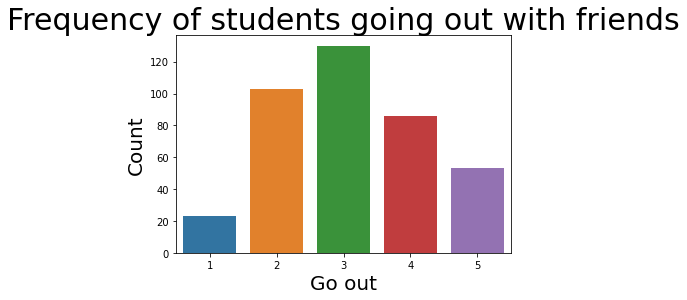

In [ ]:
#Distribution of students going out
b = sns.countplot(df['goout'])
b.axes.set_title('Frequency of students going out with friends', fontsize = 30)
b.set_xlabel('Go out', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

We can see that most students goes out with their friends on average

In [ ]:
X = ohe_dataset.drop("G3", 1)
y = ohe_dataset["G3"]

#splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2) #test size is 20% of the dataset

#printing the shapes of testing and training dataset
print("shape of original dataset :", ohe_dataset.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (395, 18)
shape of input - training set (316, 17)
shape of output - training set (316,)
shape of input - testing set (79, 17)
shape of output - testing set (79,)


# Linear Regression

In [ ]:
#define the model
model = LinearRegression()
#fit the model
model.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Linear Regression")
print('Accuracy on training set:',model.score(x_train,y_train))
print('Accuracy on test set:',model.score(x_test,y_test))

Linear Regression
Accuracy on training set: 0.852030934513355
Accuracy on test set: 0.7654023823605495


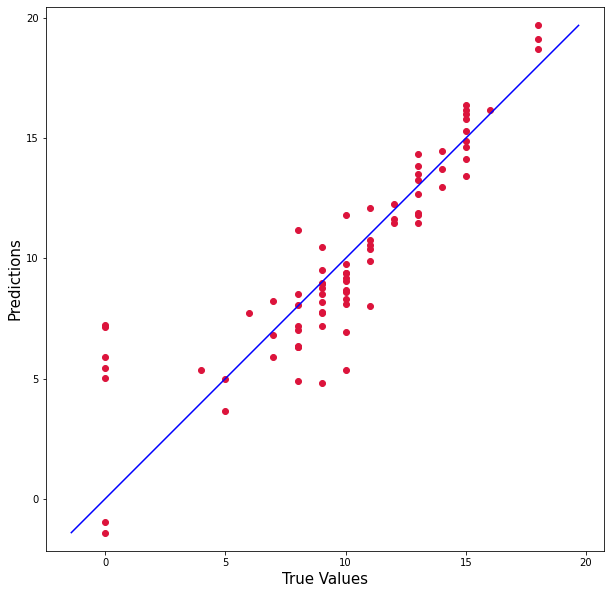

In [ ]:
prediction = model.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='crimson')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# the blue line represents the perfect regression from p1 and p2 (min max of both prediction and true value)

# Fitting the Random Forest Algorithm

In [ ]:
#Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
print("Random Forest")
print('Accuracy on training set:',rf_model.score(x_train,y_train))
print('Accuracy on test set:',rf_model.score(x_test,y_test))

Random Forest
Accuracy on training set: 0.9834561812687411
Accuracy on test set: 0.8256642334380502


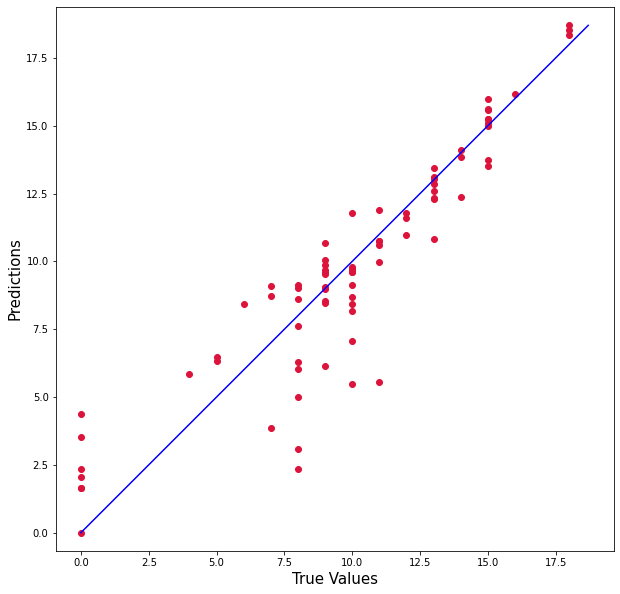

In [ ]:
prediction_rf = rf_model.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction_rf, c='crimson')

p1 = max(max(prediction_rf), max(y_test))
p2 = min(min(prediction_rf), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
mae = metrics.mean_absolute_error(y_test, prediction)
mse = metrics.mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,prediction)

print("Results of Linear Regression:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of Linear Regression:
MAE: 1.4258742451308126
MSE: 4.355448928160207
RMSE: 2.0869712331894292
R-Squared: 0.7654023823605495


In [ ]:
mae = metrics.mean_absolute_error(y_test, prediction_rf)
mse = metrics.mean_squared_error(y_test, prediction_rf)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,prediction_rf)

print("Results of Random Forest Regression:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of Random Forest Regression:
MAE: 1.2594936708860762
MSE: 3.2366506329113927
RMSE: 1.7990693796825603
R-Squared: 0.8256642334380502


Since the accuracy on Random Forest model is higher than that of Linear Regression. We decided to build our model using the Random Forest algorithm

### *Fine tuning Random Forest Model*


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(rf_model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(x_train, y_train) 

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [ ]:
#now let's how the RMSE changes for each parameter configuration
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.8122081136415344 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
1.7294926410221376 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
1.6581894992058681 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
1.5852756808790867 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
1.7541623885729252 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
1.7043560887969846 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
1.6950476370696737 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
1.5060344746086252 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
1.7930758399303517 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
1.682227593822951 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
1.7532970094156342 {'bootstrap': True, 'max

In [ ]:
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Evaluating the model on the test set

In [ ]:
# Performance metrics
grid_best = grid_search_forest.best_estimator_.predict(x_train)
errors = abs(grid_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = metrics.mean_absolute_error(y_train, grid_best)
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of 99.64 %


In [ ]:
#RMSE
grid_mse = mean_squared_error(y_train, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

The best model from the grid search has a RMSE of 0.6


### Visualization of Random Forest Hyperparameters

Text(0.5, 0, 'Tree depth')

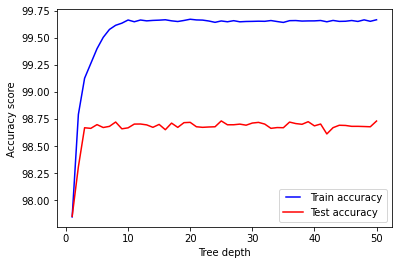

In [ ]:
max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
test_results = []

for i in max_depths:
    dt = RandomForestRegressor(max_depth=i)
    dt.fit(x_train, y_train)    
    #compute accuracy for train data
    housing_tree = dt.predict(x_train)
    errors = abs(housing_tree - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = metrics.mean_absolute_error(y_train, housing_tree)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    train_results.append(accuracy)
    
    #now again for test data
    housing_tree = dt.predict(x_test)
    errors = abs(housing_tree - y_test)
    # Calculate mean absolute percentage error (MAPE)
    mape = metrics.mean_absolute_error(y_test, housing_tree)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    test_results.append(accuracy)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depths, test_results, 'r', label= 'Test accuracy')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')